In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('traindata.csv' , encoding ="ISO-8859-1", header=None, names=['ham/spam', 'message'])

In [3]:
df.sample(5)

,ham/spam,message
5485,ham,you are a very very very very bad girl. or lady.
157,spam,you are a winner u have been specially selecte...
1779,ham,no it's waiting in e car dat's bored wat. cos ...
4140,ham,"no dice, art class 6 thru 9 :( thanks though. ..."
1852,spam,"thanks for your ringtone order, ref number r83..."


In [4]:
# check for duplicate values
df.duplicated().sum()

415

In [5]:
#remove duplicate valuse
df = df.drop_duplicates(keep='first')

In [6]:
df['ham/spam'].value_counts()

ham     4514
spam     642
Name: ham/spam, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['ham/spam'] = encoder.fit_transform(df['ham/spam'])

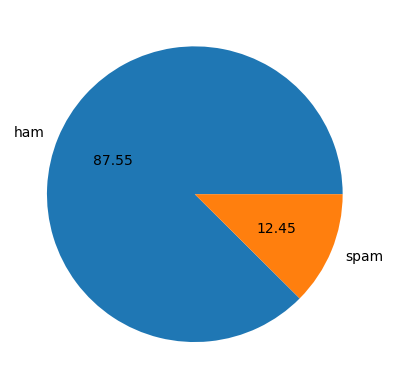

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['ham/spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [12]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5156.000000,5156.000000,5156.000000
mean,79.197634,18.512607,1.900892
std,58.304272,13.289934,1.292698
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,216.000000,24.000000


In [13]:
#ham message
df[df['ham/spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4514.000000,4514.000000,4514.000000
mean,70.862206,17.227736,1.769163
std,56.533565,13.473463,1.218939
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,216.000000,24.000000


In [14]:
# spam message
df[df['ham/spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.805296,27.546729,2.827103
std,30.113945,6.996221,1.413004
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

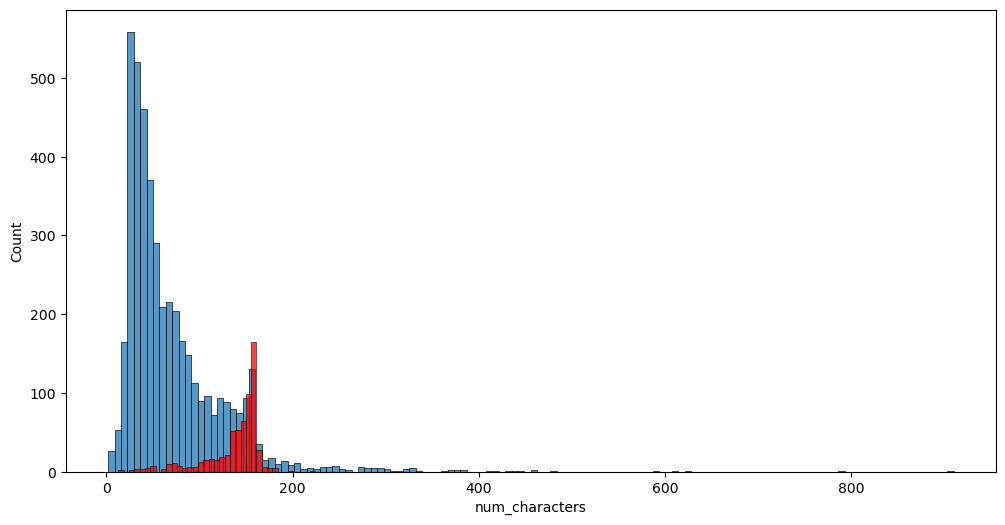

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['ham/spam'] == 0]['num_characters'])
sns.histplot(df[df['ham/spam'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

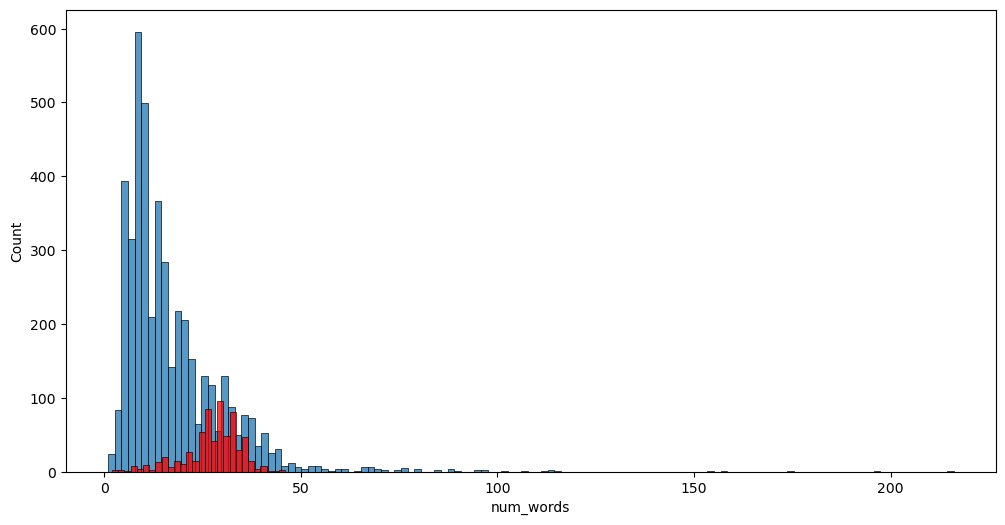

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['ham/spam'] == 0]['num_words'])
sns.histplot(df[df['ham/spam'] == 1]['num_words'],color='red')

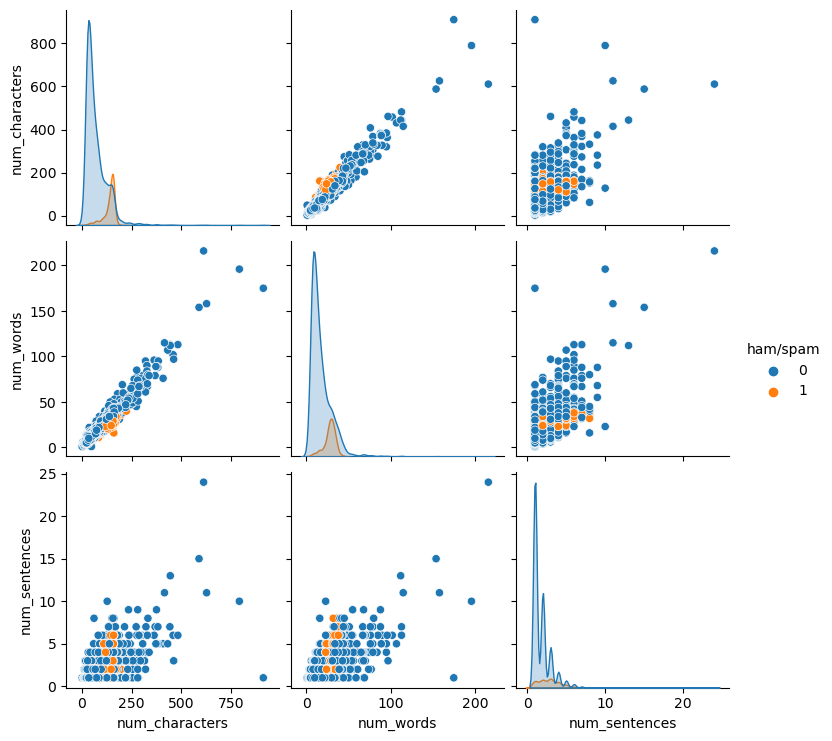

In [19]:
sns.pairplot(df,hue='ham/spam')

<AxesSubplot:>

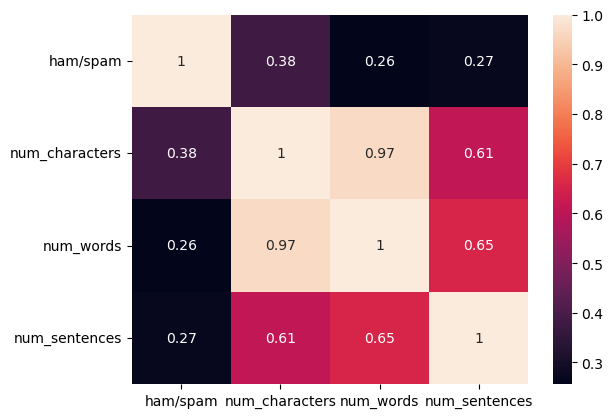

In [20]:
sns.heatmap(df.corr(),annot=True)

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [32]:

ps.stem('enjoying')

'enjoy'

In [33]:
df['transformed_message'] = df['message'].apply(transform_message)

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
spam_wc = wc.generate(df[df['ham/spam'] == 1]['transformed_message'].str.cat(sep=" "))

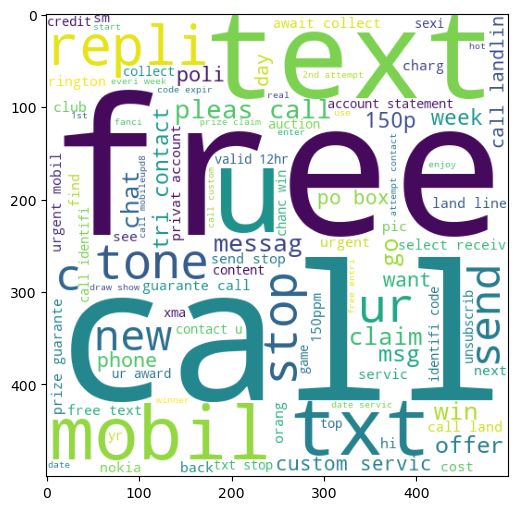

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['ham/spam'] == 0]['transformed_message'].str.cat(sep=" "))

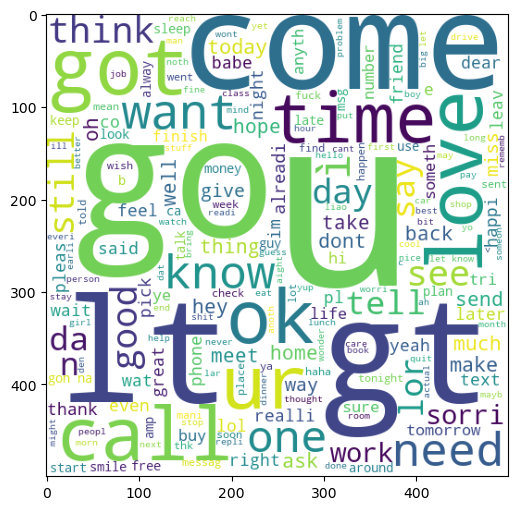

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['ham/spam'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


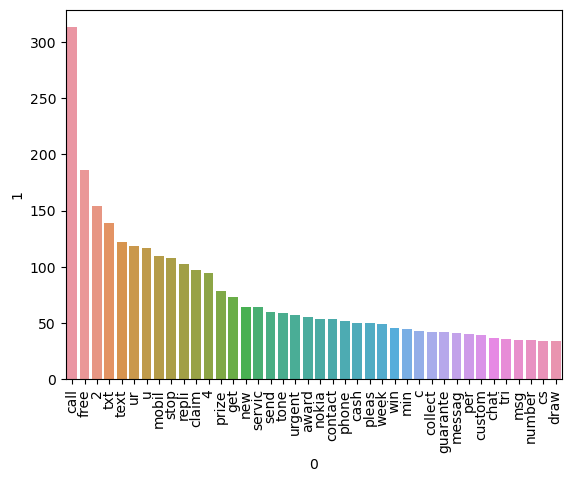

In [40]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(40))[0],pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
ham_corpus = []
for msg in df[df['ham/spam'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


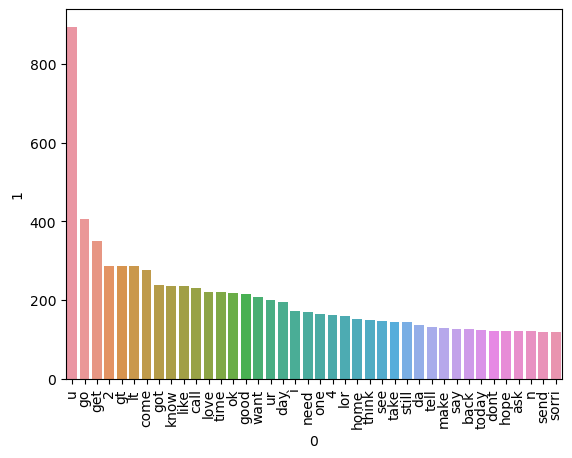

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(40))[0],pd.DataFrame(Counter(ham_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer()
# tfidf = TfidfVectorizer(max_features=3000)

In [49]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [50]:
X.shape

(5156, 6800)

In [51]:
y = df['ham/spam'].values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score

In [55]:
gnb = GaussianNB()

In [56]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8745959922430511
[[1190  163]
 [  31  163]]
0.5


In [57]:
import pickle
pickle.dump(tfidf,open('gnbscamvectorizer.pkl','wb'))
pickle.dump(gnb,open('gnb_scammodel.pkl','wb'))

In [58]:
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.preprocessing.sequence import pad_sequences
# from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [62]:
lstm_tokenizer = Tokenizer()
lstm_tokenizer.fit_on_texts(df['message'])
sequence = lstm_tokenizer.texts_to_sequences(df['message'])
padded_sequence = pad_sequences(sequence, padding='post')

In [63]:
X_train,X_test,y_train,y_test = train_test_split(padded_sequence, y, test_size=0.3)

In [64]:
# Build the model
lstm_lmodel = Sequential()
lstm_lmodel.add(Embedding(len(lstm_tokenizer.word_index) + 1, 128, input_length=padded_sequence.shape[1]))
lstm_lmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_lmodel.add(Dense(1, activation='sigmoid'))

In [65]:
# Compile the model
lstm_lmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_lmodel.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
102/102 [==============================] - 47s 433ms/step - loss: 0.3931 - accuracy: 0.8676 - val_loss: 0.3879 - val_accuracy: 0.8698
Epoch 2/3
102/102 [==============================] - 62s 609ms/step - loss: 0.3795 - accuracy: 0.8750 - val_loss: 0.3889 - val_accuracy: 0.8698
Epoch 3/3
102/102 [==============================] - 62s 611ms/step - loss: 0.3786 - accuracy: 0.8750 - val_loss: 0.3921 - val_accuracy: 0.8698


In [66]:
# Evaluate the model
y_pred2 = lstm_lmodel.predict(X_test)
y_pred2 = [round(x[0]) for x in y_pred2]
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2, average='weighted'))
print("Recall:", recall_score(y_test, y_pred2, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred2, average='weighted'))

49/49 [==============================] - 3s 55ms/step
Accuracy: 0.8778280542986425
Precision: 0.7705820929137405
Recall: 0.8778280542986425
F1 Score: 0.8207163495611405


C:\Users\Legion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
pickle.dump(lstm_tokenizer, open("tokenizer_l.pkl", "wb"))
# pickle.dump(lstmmodel, open("lstm_model.pkl", "wb"))
lstm_lmodel.save('lstmmodel_l.h5')